$\text{Quantum Superdense Coding}$

In [25]:
#Importing

import qiskit
import numpy as np
import math
from qiskit import QuantumCircuit,QuantumRegister,transpile, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, Operator
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector, plot_state_city, plot_state_qsphere, array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from  math import pi, sqrt
from qiskit.circuit.library import Initialize

mpl = 'mpl'

$\text{Create Bell State}$

In [26]:
def bell_state(qc, a, b):
    qc.h(a)
    qc.cx(a,b)


$\text{Encoding message}$

In [27]:
def encoding_message(qc, qubit, msg):
    if msg == "00":
        pass
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        print("Invalide message. sending '00'")
        
    

$\text{Decoding message}$

In [28]:
def decoding_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)


$\text{Creating Circuit}$

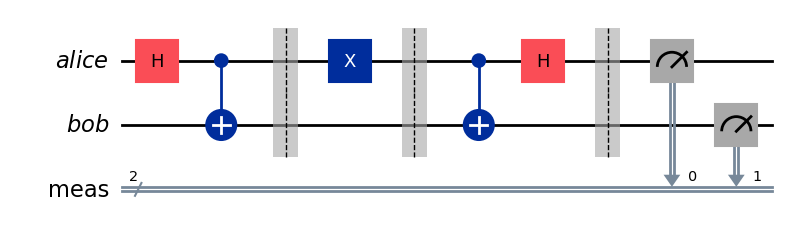

In [29]:
alice = QuantumRegister(1, name='alice')
bob = QuantumRegister(1, name='bob')
qc = QuantumCircuit(alice, bob)

bell_state(qc, 0, 1)
qc.barrier()

message ='10'

encoding_message(qc, 0, message)
qc.barrier()

decoding_message(qc, 0, 1)

qc.measure_all()
qc.draw(mpl)

$\text{QASM simulator}$

the total counts are:  {'10': 1000}


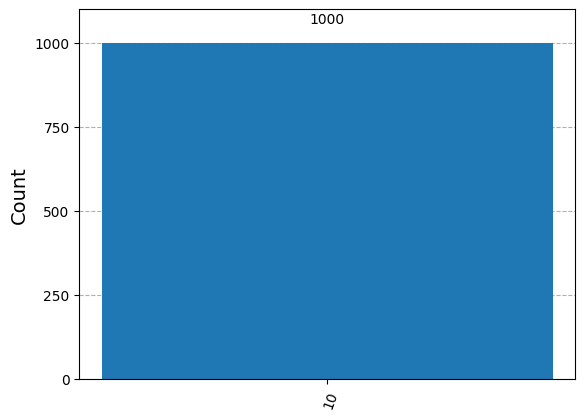

In [30]:
#qasm simulator

backend = Aer.get_backend('qasm_simulator')

circ = transpile(qc, backend)

job = backend.run(circ, shots=1000)



result = job.result()

counts = result.get_counts(circ)

print("the total counts are: ", counts)

plot_histogram(counts)